In [137]:
import pandas as pd
import numpy as np

In [138]:
trades_df = pd.read_csv("/content/drive/MyDrive/primetrade_data/historical_data.csv")

In [139]:
sentiment_df = pd.read_csv("/content/drive/MyDrive/primetrade_data/fear_greed_index.csv")

In [140]:
trades_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [141]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [142]:
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [143]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [144]:
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], dayfirst=True)
trades_df['Date'] = trades_df['Timestamp IST'].dt.date  # Extract the date for merging

In [145]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df['Date'] = sentiment_df['date'].dt.date

In [146]:
sentiment_df.info()
sentiment_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
 4   Date            2644 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 103.4+ KB


,timestamp,value,classification,date,Date
2335,1719466200,40,Fear,2024-06-27,2024-06-27
466,1557984600,75,Extreme Greed,2019-05-16,2019-05-16
2132,1701927000,72,Greed,2023-12-07,2023-12-07
985,1602826200,52,Neutral,2020-10-16,2020-10-16
1756,1669440600,22,Extreme Fear,2022-11-26,2022-11-26


In [147]:
print(sentiment_df['classification'].value_counts())

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64


In [148]:
trades_df.info()
trades_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [149]:
print(trades_df['Timestamp IST'].head())
print(trades_df['Date'].head())

0   2024-12-02 22:50:00
1   2024-12-02 22:50:00
2   2024-12-02 22:50:00
3   2024-12-02 22:50:00
4   2024-12-02 22:50:00
Name: Timestamp IST, dtype: datetime64[ns]
0    2024-12-02
1    2024-12-02
2    2024-12-02
3    2024-12-02
4    2024-12-02
Name: Date, dtype: object


In [150]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification', 'date', 'Date'], dtype='object')

In [151]:
# Merge the datasets on the 'Date' column
merged_df = pd.merge(trades_df, sentiment_df[['Date', 'classification']], on='Date', how='left')

# Rename for clarity
merged_df.rename(columns={'classification': 'Sentiment'}, inplace=True)

# Preview the merged data
print(merged_df[['Timestamp IST', 'Account', 'Coin', 'Closed PnL', 'Sentiment']].head())

        Timestamp IST                                     Account  Coin  \
0 2024-12-02 22:50:00  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   
1 2024-12-02 22:50:00  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   
2 2024-12-02 22:50:00  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   
3 2024-12-02 22:50:00  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   
4 2024-12-02 22:50:00  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107   

   Closed PnL      Sentiment  
0         0.0  Extreme Greed  
1         0.0  Extreme Greed  
2         0.0  Extreme Greed  
3         0.0  Extreme Greed  
4         0.0  Extreme Greed  


In [152]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,Greed
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,Greed
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,Greed
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,Greed


In [153]:
merged_df.info()
print('columns of merged_df',merged_df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

## **Univariate Analysis**

#### 1.  Activity & Volume Behavior



```
1.1 Number of Trades by Sentiment
```



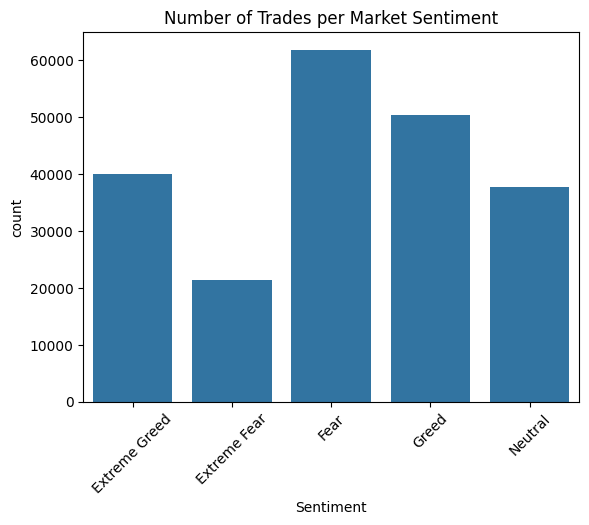

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for sentiment
sns.countplot(x='Sentiment', data=merged_df)
plt.title("Number of Trades per Market Sentiment")
plt.xticks(rotation=45)
plt.show()




```
Observation:
1. More trades happen during Fear, suggesting reactionary or defensive trading behavior. Strategy designers can
anticipate increased volatility or demand for hedging products during such times.
```





```
1.2  Average Trade Size (USD) by Sentiment
```



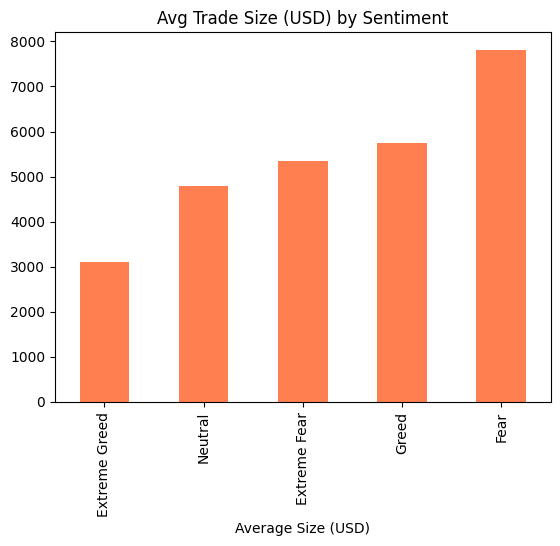

In [155]:
merged_df.groupby('Sentiment')['Size USD'].mean().sort_values().plot(
    kind='bar', color='coral', title='Avg Trade Size (USD) by Sentiment'
)
plt.xlabel('Average Size (USD)')
plt.show()




```
Observation:
1. I noticed that the average trade size in USD was actually highest during Fear, and not during Greed like I expected.

Insight:
This might mean that traders place fewer but larger trades when they are scared, possibly to exit quickly
or protect big positions. So during Fear, there is a lot of money moving around, just not many small trades.
This could be useful to know when designing risk management systems.
```





```
1.3  Average Start Position (as leverage proxy)
```



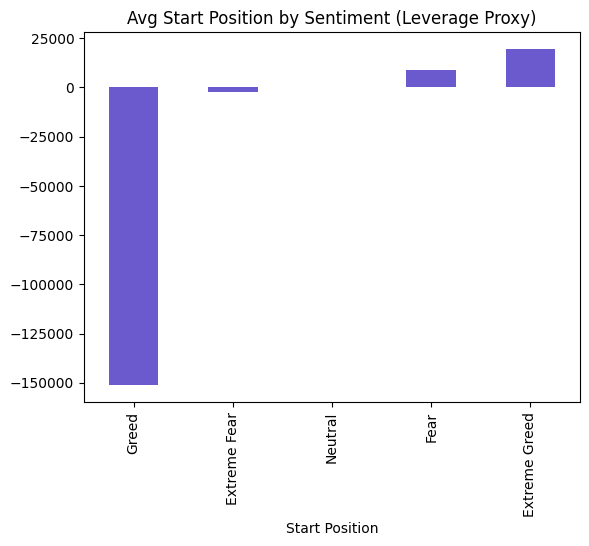

In [156]:
merged_df.groupby('Sentiment')['Start Position'].mean().sort_values().plot(
    kind='bar', color='slateblue', title='Avg Start Position by Sentiment (Leverage Proxy)'
)
plt.xlabel('Start Position')
plt.show()




```
Observation:
1. During Extreme Greed, the average start position is really high, which probably means traders are using a lot of leverage.
But what is interesting is that in regular Greed, the value is actually negative and large.
Insight:
This shows that traders are probably aggressive in Extreme Greed, taking bigger and riskier positions. But in normal Greed,
the negative values might point to people closing or reversing positions quickly, maybe because they are expecting a correction.
So, both types of Greed have different trading behaviors and risks.
```





```
1.4 Total Trade Volume
```



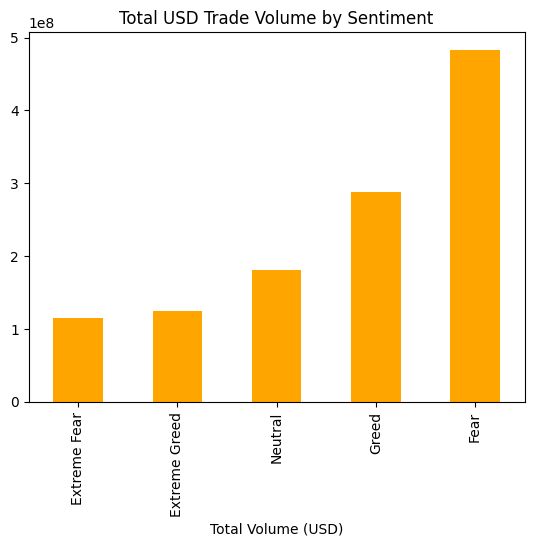

In [157]:
# Total traded USD volume by sentiment
volume_by_sentiment = merged_df.groupby('Sentiment')['Size USD'].sum().sort_values()

volume_by_sentiment.plot(kind='bar', color='orange')
plt.title('Total USD Trade Volume by Sentiment')
plt.xlabel('Total Volume (USD)')
plt.show()



```
Observation:
1. The total amount of money traded (USD volume) is highest during Fear.

Insight:
Even though people might be nervous, they are still trading a lot, maybe trying to get out of positions or
make quick decisions in a volatile market. This means that Fear is actually a high-activity zone, and strategies
should be ready for big movements and high volume during these times
```



#### 2. Trader Performance Patterns



```
2.1 Average Closed PnL by Sentiment
```



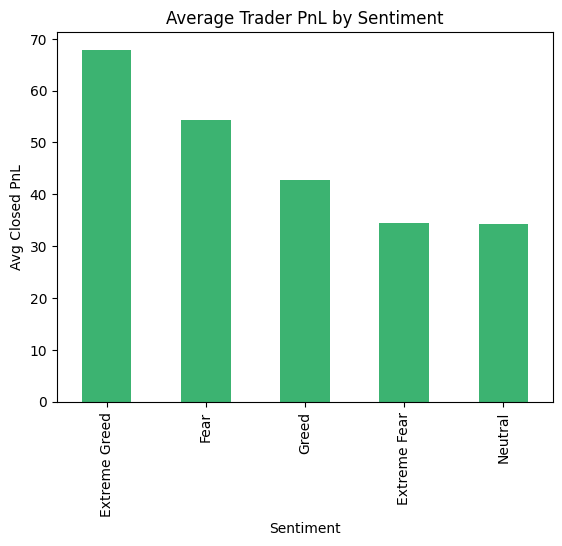

In [158]:
avg_pnl = merged_df.groupby('Sentiment')['Closed PnL'].mean().sort_values(ascending=False)
avg_pnl.plot(kind='bar', color='mediumseagreen', title='Average Trader PnL by Sentiment')
plt.ylabel("Avg Closed PnL")
plt.show()



```
Observation:
1. The highest average PnL was during Extreme Greed, followed by Fear, and then Greed.

Insight:
Traders seem to perform the best when the market is extremely optimistic. It is also interesting that performance
during Fear is better than in regular Greed, maybe because some traders use Fear periods to take advantage of short-term opportunities.
This shows that market mood really affects how profitable trades are.
```





```
2.2 PnL Distribution per Sentiment (Boxplot)
```



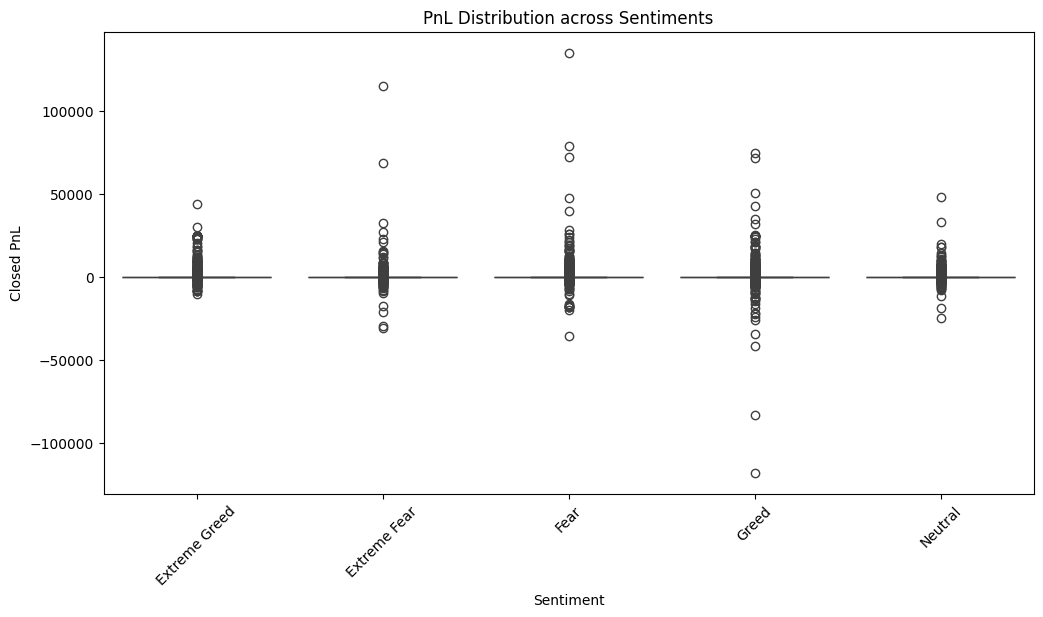

In [159]:
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df, x='Sentiment', y='Closed PnL')
plt.title("PnL Distribution across Sentiments")
plt.xticks(rotation=45)
plt.show()




```
Observation:

1. In all sentiments, the median PnL is around zero, meaning most trades are small wins or losses.
2. Extreme Greed and Extreme Fear have a few very high PnL outliers, but most trades are still centered close to zero.
3. Greed has a wider spread, which means traders are seeing both good profits and losses.

Insight:
Even though extreme sentiments like Extreme Greed or Fear can lead to big wins, these are rare cases.
Most trades don’t have extreme outcomes. But the wider range in Greed tells us that traders might be taking more chances,
which results in more variability in outcomes. This could help in designing risk filters for different market moods.
```




```
2.3 PnL vs Trade Size (USD)
```



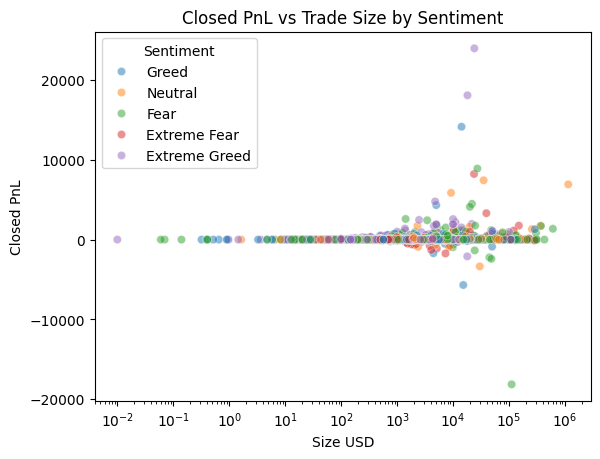

In [160]:
sns.scatterplot(data=merged_df.sample(5000), x='Size USD', y='Closed PnL', hue='Sentiment', alpha=0.5)
plt.title("Closed PnL vs Trade Size by Sentiment")
plt.xscale("log")  # Because trade sizes can vary widely
plt.show()




```
Observation:

1. Most trades, regardless of size, end up with a PnL near zero.
2. Larger trades sometimes lead to higher PnL (up to 15,000), especially during Greed and Extreme Greed.
3. Negative PnLs (down to -500) are scattered and don’t strongly depend on trade size or sentiment.

Insight:
Taking bigger trades can increase the chances of bigger profits, especially when the market is optimistic.
However, it doesn’t guarantee better results, many large trades still result in small gains or losses.
So it’s important to have position sizing rules that adapt to market sentiment.
```





```
2.4 PnL vs Start Position (Leverage Proxy)
```



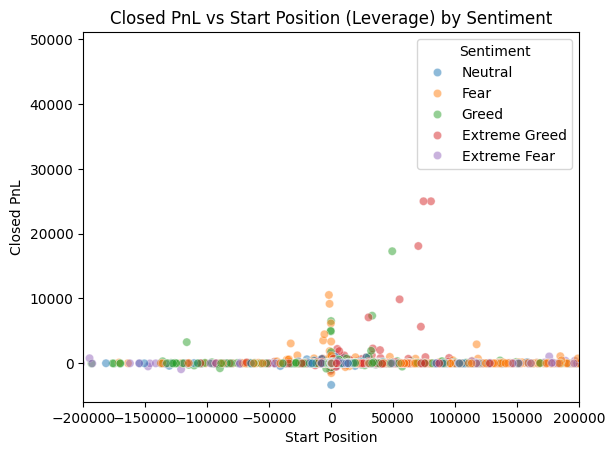

In [161]:
sns.scatterplot(data=merged_df.sample(5000), x='Start Position', y='Closed PnL', hue='Sentiment', alpha=0.5)
plt.title("Closed PnL vs Start Position (Leverage) by Sentiment")
plt.xlim(-2e5, 2e5)  # Zoom in to reduce extreme outliers
plt.show()




```
Observation:
1. Most trades, no matter the start position, have PnL close to zero.
2. In Extreme Greed, a few trades reach up to +20,000, showing profit potential.
But in Greed, there's a clear outlier with a big loss of -80,000.

Insight:
High leverage during Greed can lead to heavy losses, even though the sentiment is positive. In Extreme Greed, some
high-leverage trades do well. So it’s important to adjust leverage based on sentiment risk, not just optimism.
```



#### 3. Trader Behavior & Risk Patterns



```
3.1 Trade Side (Buy/Sell) Distribution by Sentiment
```



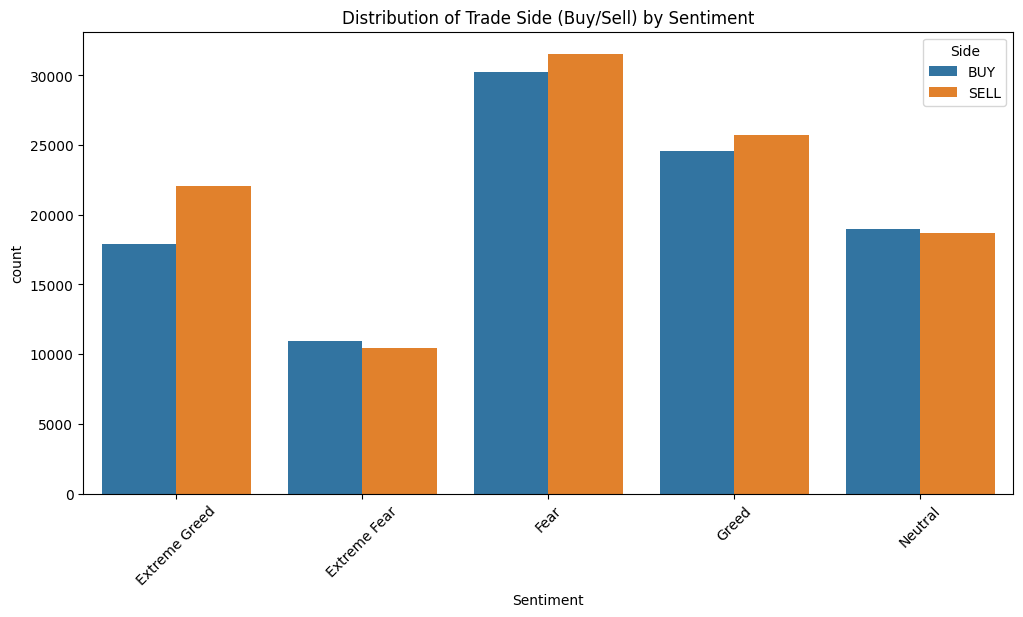

In [162]:
plt.figure(figsize=(12,6))
sns.countplot(data=merged_df, x='Sentiment', hue='Side')
plt.title("Distribution of Trade Side (Buy/Sell) by Sentiment")
plt.xticks(rotation=45)
plt.show()



```
Observation:

1. During Fear, both Buy and Sell trades spike, with Sell trades slightly more common.
2. In Extreme Greed, Sell trades are also higher than Buy.
Extreme Fear sees a drop in overall activity but with balanced Buy/Sell counts.

Insight:
Traders seem to sell more aggressively during Fear and Extreme Greed. This might reflect attempts to
lock in profits or reduce exposure during uncertain or overheated markets.
```





```
3.2 Average Fee Paid per Trade by Sentiment
```



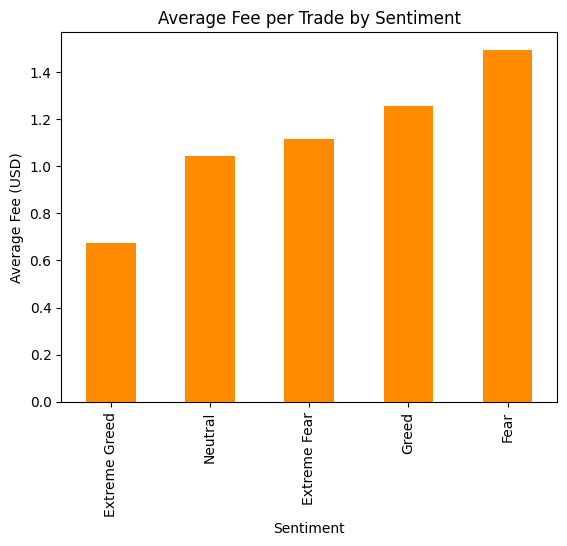

In [163]:
merged_df.groupby('Sentiment')['Fee'].mean().sort_values().plot(
    kind='bar', color='darkorange', title='Average Fee per Trade by Sentiment'
)
plt.ylabel("Average Fee (USD)")
plt.show()




```
Observation:

1. The highest average fees are paid during Fear, followed by Greed.
2. Extreme Greed shows the lowest fee per trade.

Insight:
In fearful markets, traders may execute more frequent or rushed trades, leading to higher fees.
In contrast, during Extreme Greed, they may take fewer but larger trades, keeping fees lower.
```





```
3.3 Direction vs PnL by Sentiment
```



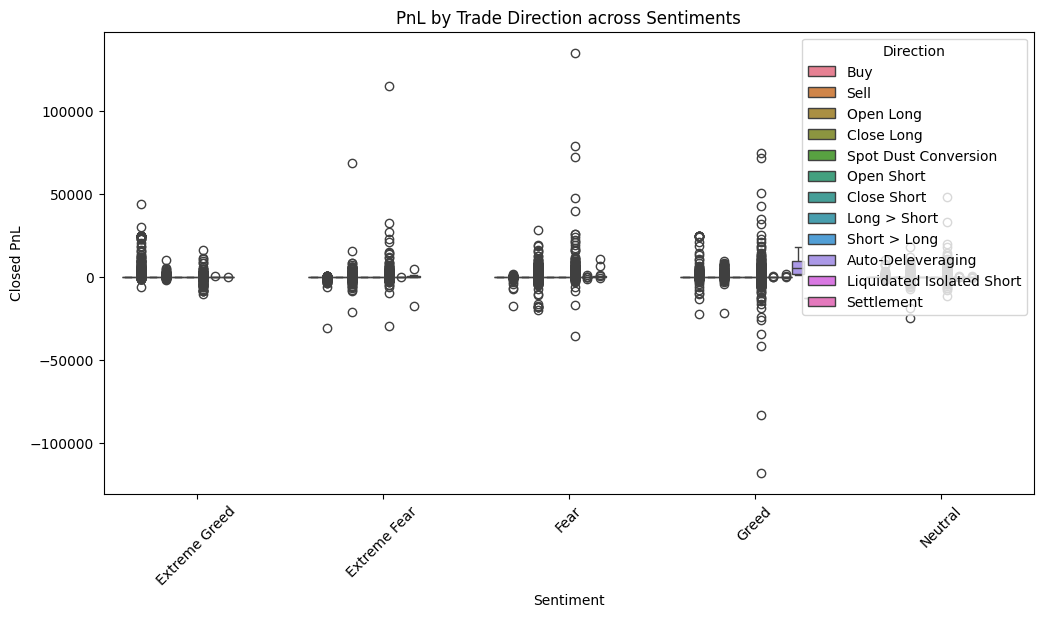

In [164]:
plt.figure(figsize=(12,6))
sns.boxplot(data=merged_df, x='Sentiment', y='Closed PnL', hue='Direction' )
plt.title("PnL by Trade Direction across Sentiments")
plt.xticks(rotation=45)
plt.show()



```
Observation:

1. Across all sentiments, most trade directions (Buy/Sell/Open/Close) show PnL values clustered near zero, with a few outliers.
2. Outliers with large profits/losses are present in all sentiments, especially in Greed and Fear.

Insight:
There is no one direction that guarantees profit, outcomes are mixed across directions.
However, the variability increases in Greed/Fear, suggesting strategy performance heavily depends on timing.


```





```
3.4 High-Risk Trade Patterns
```



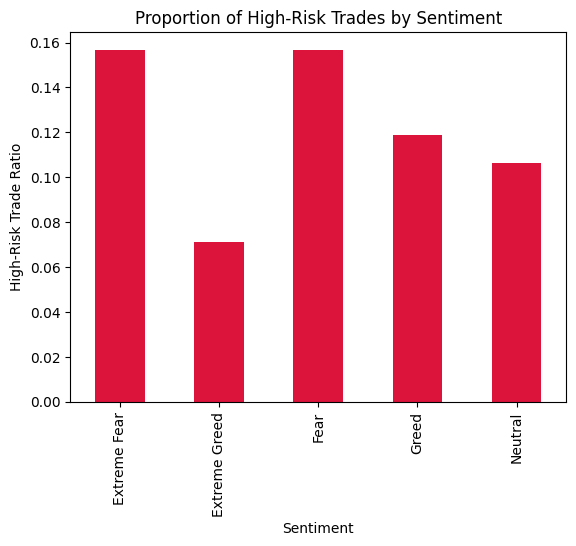

In [165]:
# Create a high-risk tag based on Start Position
merged_df['High Risk'] = merged_df['Start Position'].abs() > 1e5

# Proportion of high-risk trades per sentiment
high_risk_ratio = merged_df.groupby('Sentiment')['High Risk'].mean()

high_risk_ratio.plot(kind='bar', color='crimson', title='Proportion of High-Risk Trades by Sentiment')
plt.ylabel("High-Risk Trade Ratio")
plt.show()




```
Observation:

1. Fear and Extreme Fear have the highest share of high-risk trades.
2. Extreme Greed has the lowest proportion of high-risk trades.

Insight:
Surprisingly, traders take more high-risk positions during fear, possibly trying to recover losses or gamble on reversals.
This is risky behavior that could be flagged in a real-time risk system.
```



## **Bivariate and Multivariate Analysis**



```
1. Sentiment vs Trade Size vs PnL
```



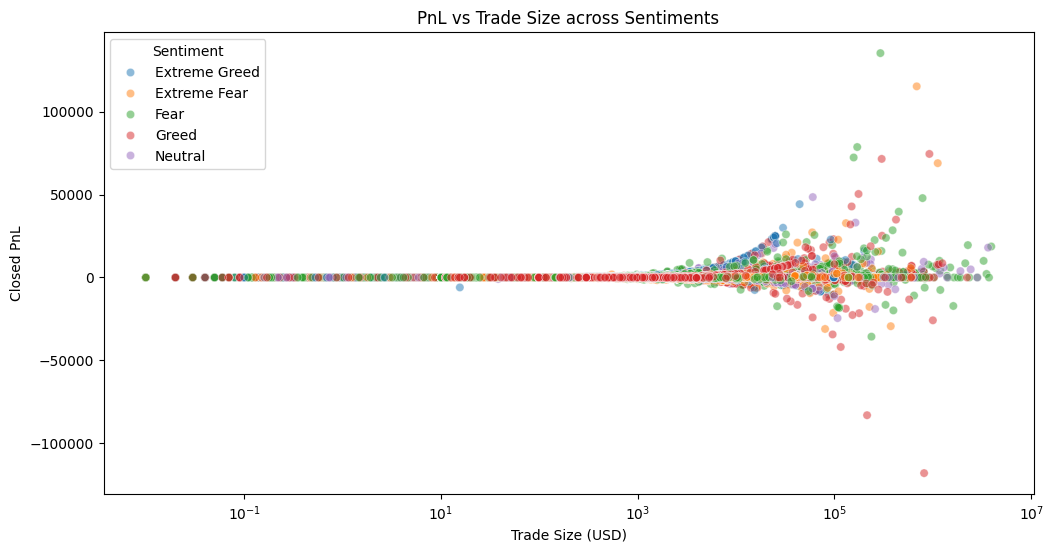

In [166]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=merged_df, x='Size USD', y='Closed PnL', hue='Sentiment', alpha=0.5)
plt.title("PnL vs Trade Size across Sentiments")
plt.xscale('log')  # log scale for better spread visibility
plt.ylabel("Closed PnL")
plt.xlabel("Trade Size (USD)")
plt.show()



```
Observation:
1. Most trades cluster around 0 PnL.
2. Larger trade sizes show more variability in PnL—both gains and losses.
3. A few high PnL outliers are visible across all sentiments, especially in Greed and Fear.
```





```
2. Start Position vs Fee Colored by Sentiment
```



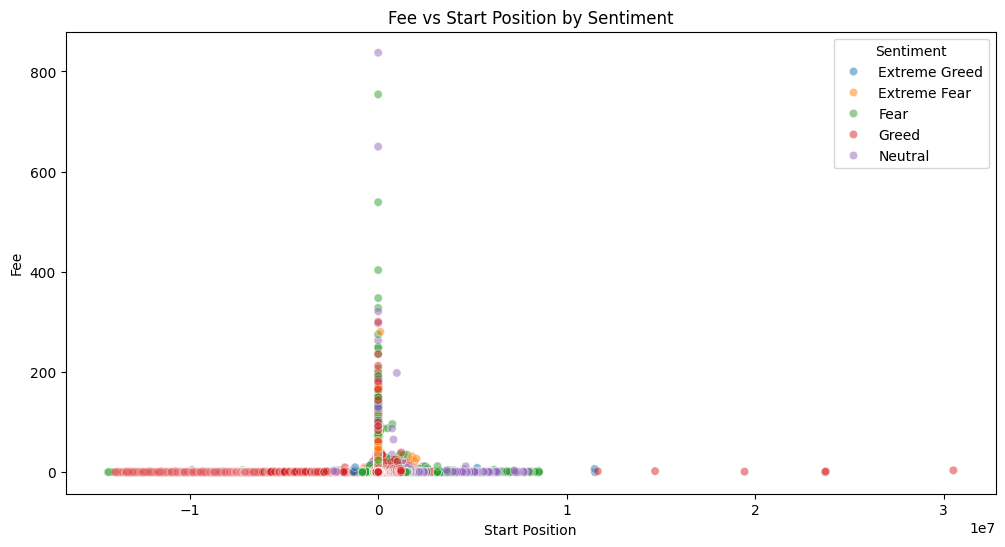

In [167]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=merged_df, x='Start Position', y='Fee', hue='Sentiment', alpha=0.5)
plt.title("Fee vs Start Position by Sentiment")
plt.show()



```
Observation:
1. Most data points show low fees.
2. Some rare trades with extreme start positions incur high fees, often seen in Fear and Neutral sentiment.
```





```
3. Correlation Heatmap
```



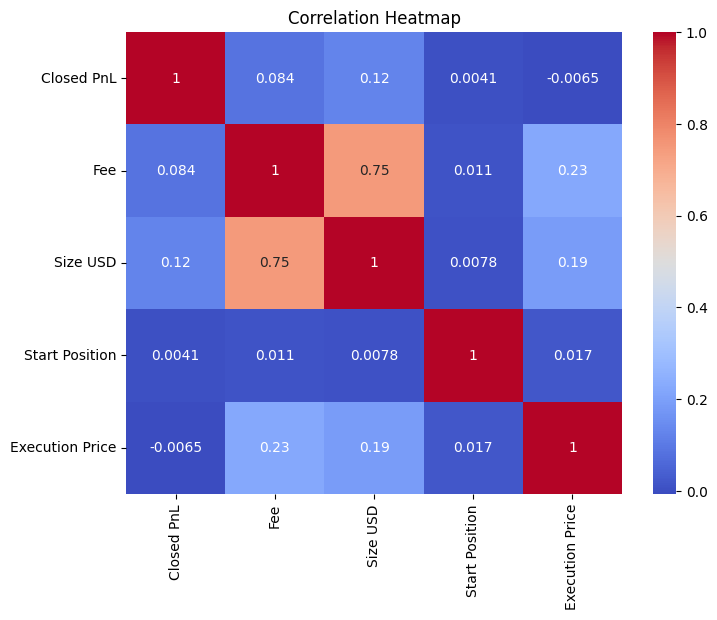

In [168]:
plt.figure(figsize=(8,6))
sns.heatmap(merged_df[['Closed PnL', 'Fee', 'Size USD', 'Start Position', 'Execution Price']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()




```
Observation:
1. Moderate positive correlation between Fee and Size USD (0.75), as expected.

2. Closed PnL has a weak correlation with other numerical features, indicating PnL is likely influenced
by external factors (like sentiment or direction).
```





```
4. PnL vs Trade Direction × Sentiment (Multivariate Boxplot)
```



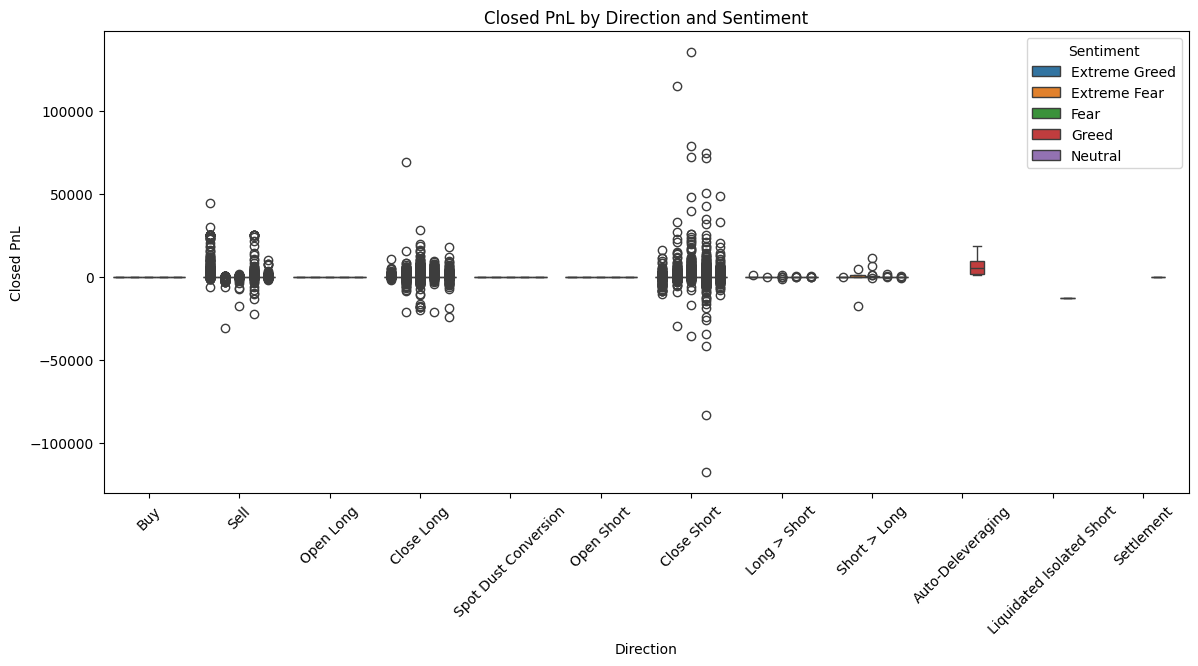

In [169]:
plt.figure(figsize=(14,6))
sns.boxplot(data=merged_df, x='Direction', y='Closed PnL', hue='Sentiment')
plt.xticks(rotation=45)
plt.title("Closed PnL by Direction and Sentiment")
plt.show()



```
Observation:
1. Directions like Close Short and Sell show higher PnL spread, with Greed and Fear showing more extreme outcomes.
2. Most other directions result in PnL clustering around zero.

```





```
5.  Pairplot: Explore relationships between numerical features across sentiments

```



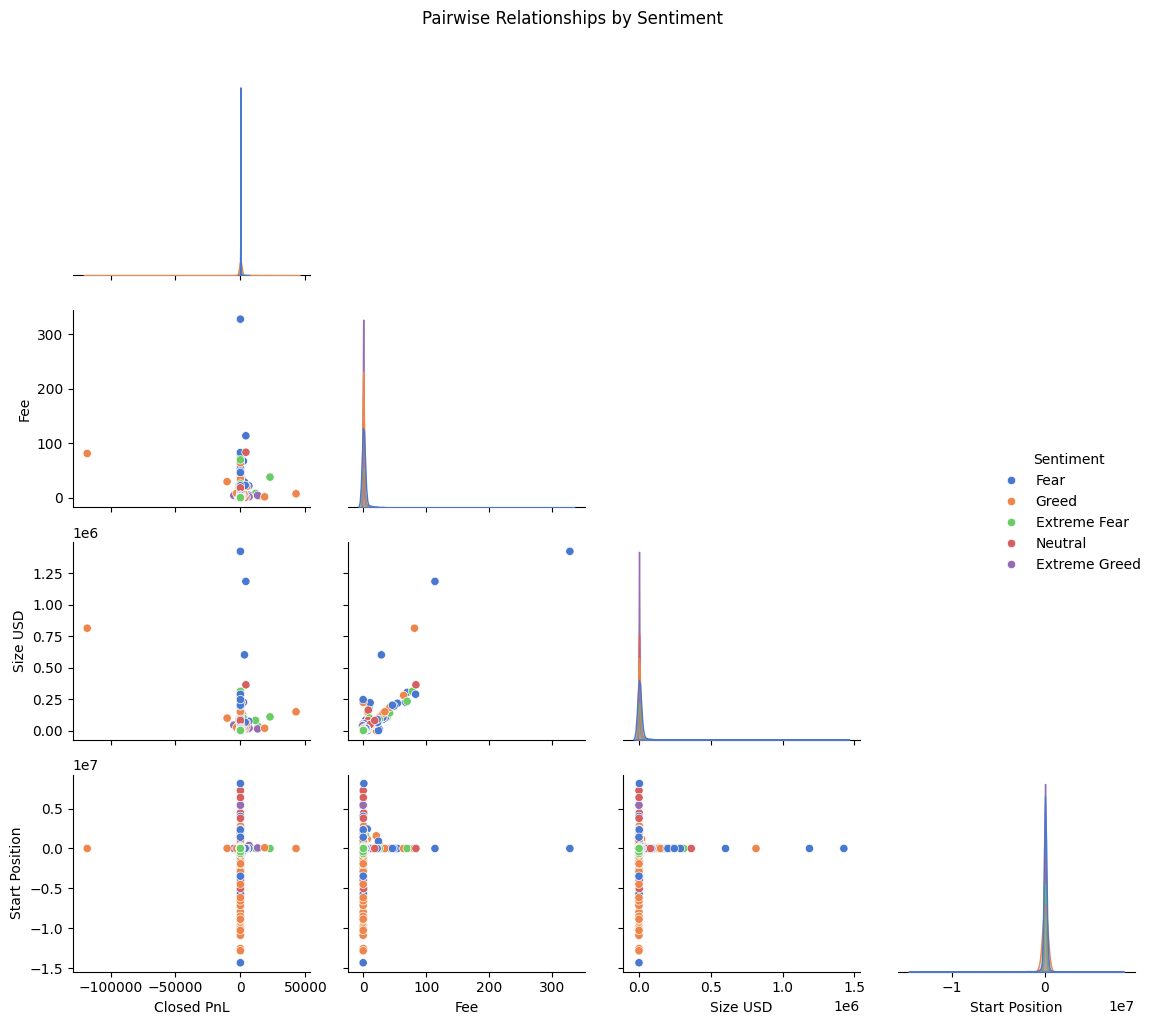

In [170]:
# Sample subset for faster rendering
sample_df = merged_df.sample(n=5000, random_state=42)

sns.pairplot(
    sample_df,
    vars=['Closed PnL', 'Fee', 'Size USD', 'Start Position'],
    hue='Sentiment',
    corner=True,
    diag_kind='kde',
    palette='muted'
)
plt.suptitle('Pairwise Relationships by Sentiment', y=1.02)
plt.tight_layout()
plt.show()




```
Observation:
1. Most data points are concentrated near the origin (0), suggesting that most trades are of small size and low fee with PnL close to zero.

2. A few extreme outliers exist in:
Fee vs Size USD - Very high trade size leads to higher fees.
Closed PnL vs Size USD - Some large trades have very high or very low PnL, mostly under Fear and Greed sentiments.

3. Distributions:
Closed PnL has a slightly right-skewed distribution, especially under Extreme Greed.
Fee and Size USD show positive skewness, reflecting that while most trades are small, a few large trades dominate the totals.
No strong linear relationship is seen, but Sentiment affects dispersion:
Under Greed and Fear, the spread in PnL and Size increases.
Neutral and Extreme Fear show tighter clusters.
```





```
6. Catplot: Compare PnL distribution across Sentiment & Side (Buy/Sell)
```



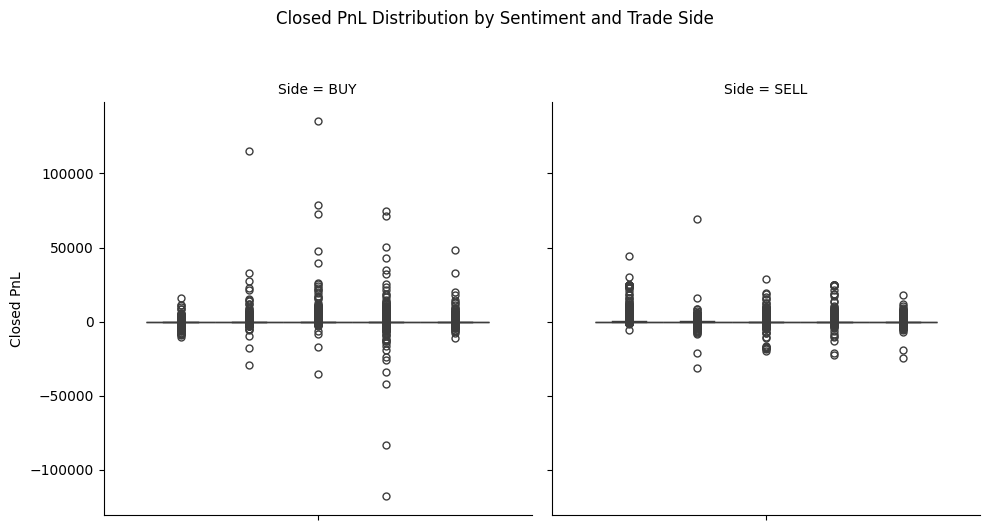

In [171]:
sns.catplot(
    data=merged_df,
    hue='Sentiment',
    y='Closed PnL',
    kind='box',
    col='Side',
    col_order=['BUY', 'SELL'],
    height=5,
    aspect=1,
    # palette='Set2',
    legend = False
)
plt.suptitle('Closed PnL Distribution by Sentiment and Trade Side', y=1.05)
plt.tight_layout()
plt.show()




```
Observation:
1. BUY trades show more extreme positive and negative outliers compared to SELL trades.
2. This suggests that BUY trades are riskier, with higher potential for both profit and loss.
```





```
7. KDE Plot: Density of PnL across sentiments
```



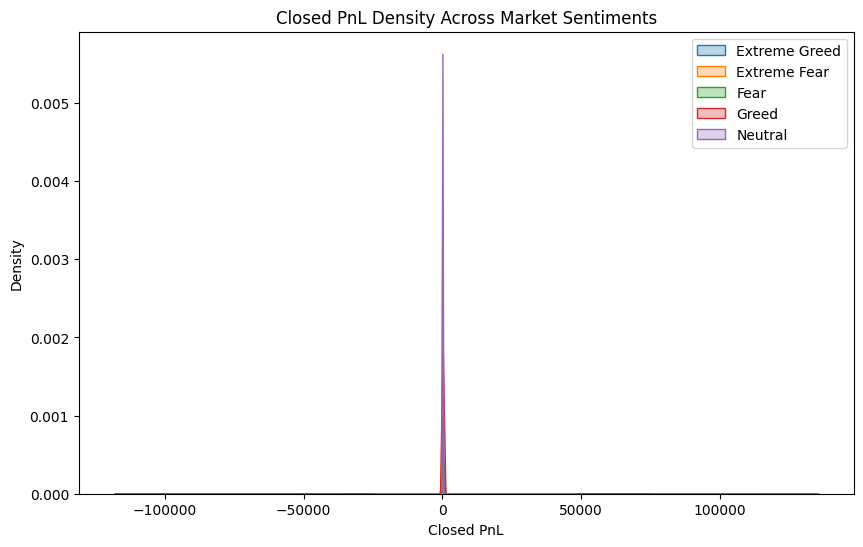

In [172]:
plt.figure(figsize=(10, 6))
for sentiment in merged_df['Sentiment'].dropna().unique():
    sns.kdeplot(
        data=merged_df[merged_df['Sentiment'] == sentiment],
        x='Closed PnL',
        label=sentiment,
        fill=True,
        alpha=0.3
    )
plt.title("Closed PnL Density Across Market Sentiments")
plt.xlabel("Closed PnL")
plt.legend()
plt.show()




```
Observation:
1. All sentiments peak sharply at 0 PnL, with Neutral showing the most concentrated peak.
2. Greed has a slight right tail, hinting at potential upside.
3. Extreme Greed, Extreme Fear, and Fear show limited spread, indicating low variability.
```





```
8. FacetGrid: Fee vs Trade Size by Sentiment
```



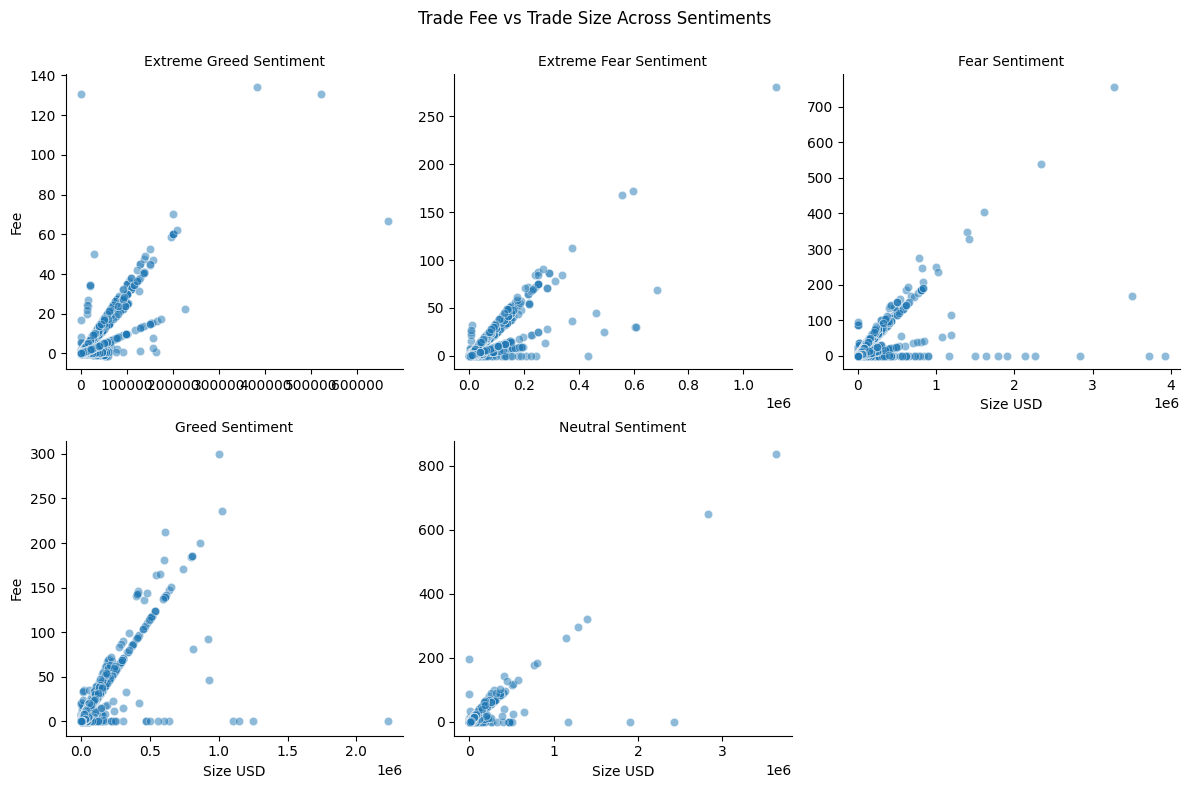

In [173]:
g = sns.FacetGrid(merged_df, col='Sentiment', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.scatterplot, 'Size USD', 'Fee', alpha=0.5)
g.set_titles(col_template="{col_name} Sentiment")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Trade Fee vs Trade Size Across Sentiments')
plt.show()




```
Observation:
1. Fee increases with trade size, though the rate and upper limits vary by sentiment.
2. Greed and Fear sentiments show steeper fee growth with larger trades
```





```
9. Heatmap: Average PnL by Sentiment & Direction
```



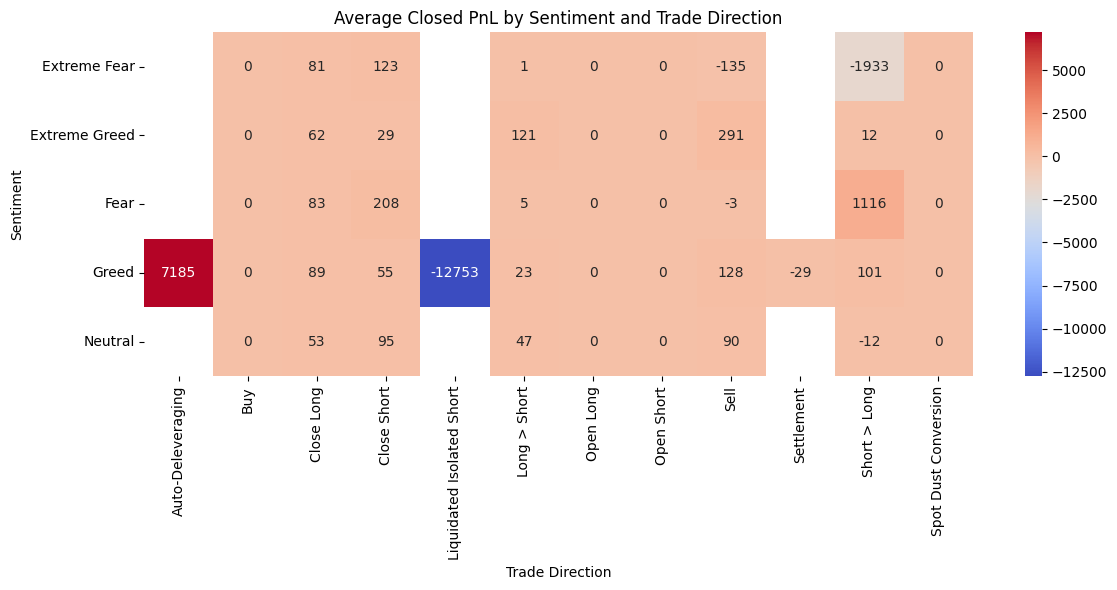

In [174]:
pivot = merged_df.pivot_table(values='Closed PnL', index='Sentiment', columns='Direction', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='coolwarm')
plt.title("Average Closed PnL by Sentiment and Trade Direction")
plt.xlabel("Trade Direction")
plt.ylabel("Sentiment")
plt.tight_layout()
plt.show()




```
Observation:
1. Greed sentiment leads to the highest variability in outcomes (both gains and losses).
2. Trade direction plays a key role in determining PnL.
3. Other sentiments show moderate or stable PnL, with occasional losses or
gains based on direction.
```



#### 4. Direction-wise Analysis



```
4.1 Distribution of Trades by Direction and Sentiment
```



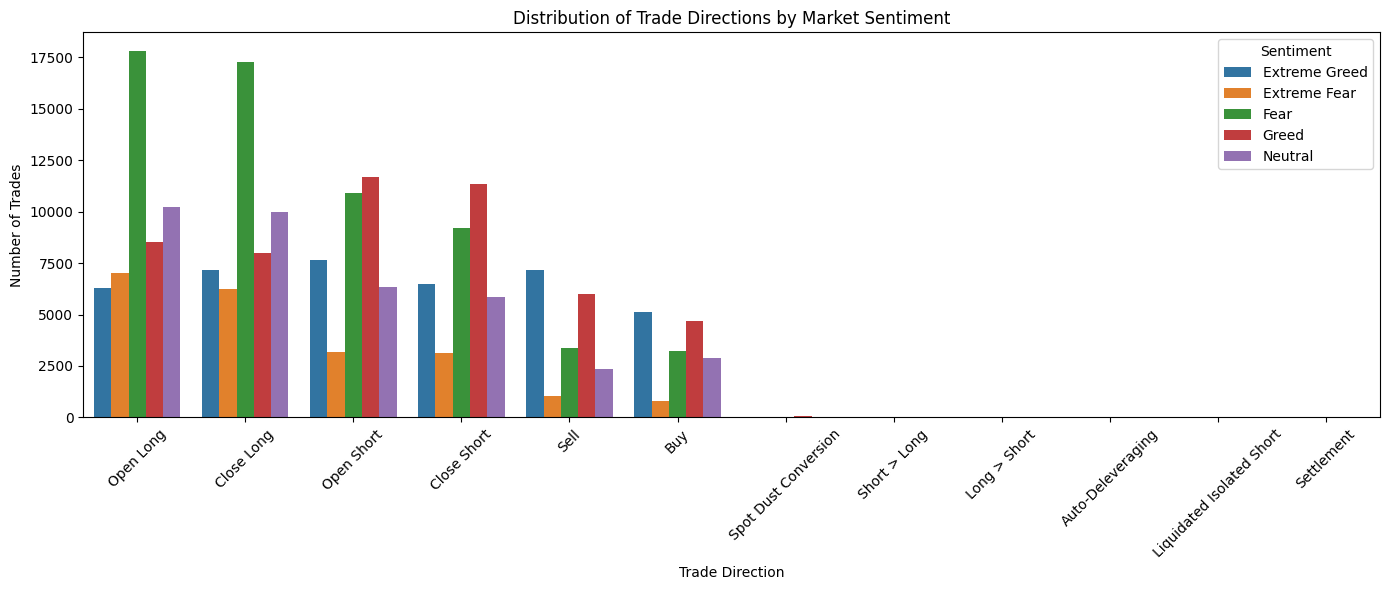

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.countplot(data=merged_df, x='Direction', hue='Sentiment', order=merged_df['Direction'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Trade Directions by Market Sentiment')
plt.xlabel('Trade Direction')
plt.ylabel('Number of Trades')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()



```
Observation:
1. The highest number of trades occur in "Open Long" and "Close Long", especially under Extreme Fear, with over 15,000 trades each.
2. "Open Short" and "Close Short" also show strong activity, particularly in Extreme Greed and Fear, with 7,000–10,000 trades.
3. "Sell" and "Buy" directions have moderate volumes, mainly during Greed and Neutral sentiments (approx. 5,000–7,000 trades).
4. Rare directions like "Auto-Deleveraging", "Liquidated Isolated Short", and "Spot Dust Conversion" appear infrequently (under 1,000 trades).
5. Neutral sentiment is present across nearly all directions but is never the leading one, suggesting that traders act more decisively in emotional markets.
```





```
4.2 PnL Distribution by Direction and Sentiment
```



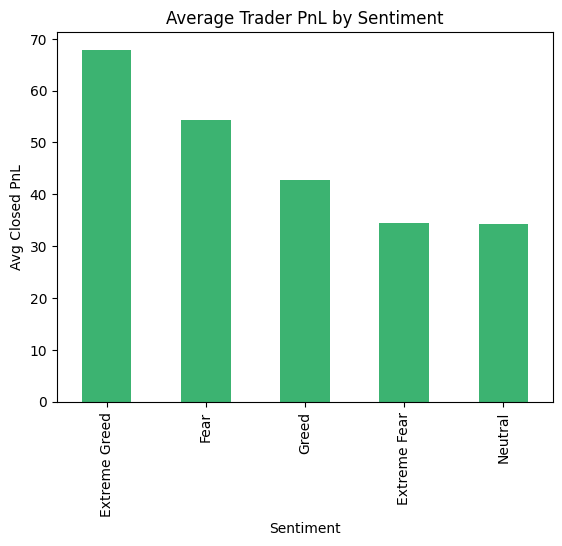

In [176]:
avg_pnl = merged_df.groupby('Sentiment')['Closed PnL'].mean().sort_values(ascending=False)
avg_pnl.plot(kind='bar', color='mediumseagreen', title='Average Trader PnL by Sentiment')
plt.ylabel("Avg Closed PnL")
plt.show()




```
Observation:
1. The highest average PnL was during Extreme Greed, followed by Fear, and then Greed.

Insight:
Traders seem to perform the best when the market is extremely optimistic. It is also interesting that performance
during Fear is better than in regular Greed, maybe because some traders use Fear periods to take advantage of short-term opportunities.
This shows that market mood really affects how profitable trades are.
```



#### 5. Time-Based Analysis



```
5.1 Daily Sentiment Trend
```



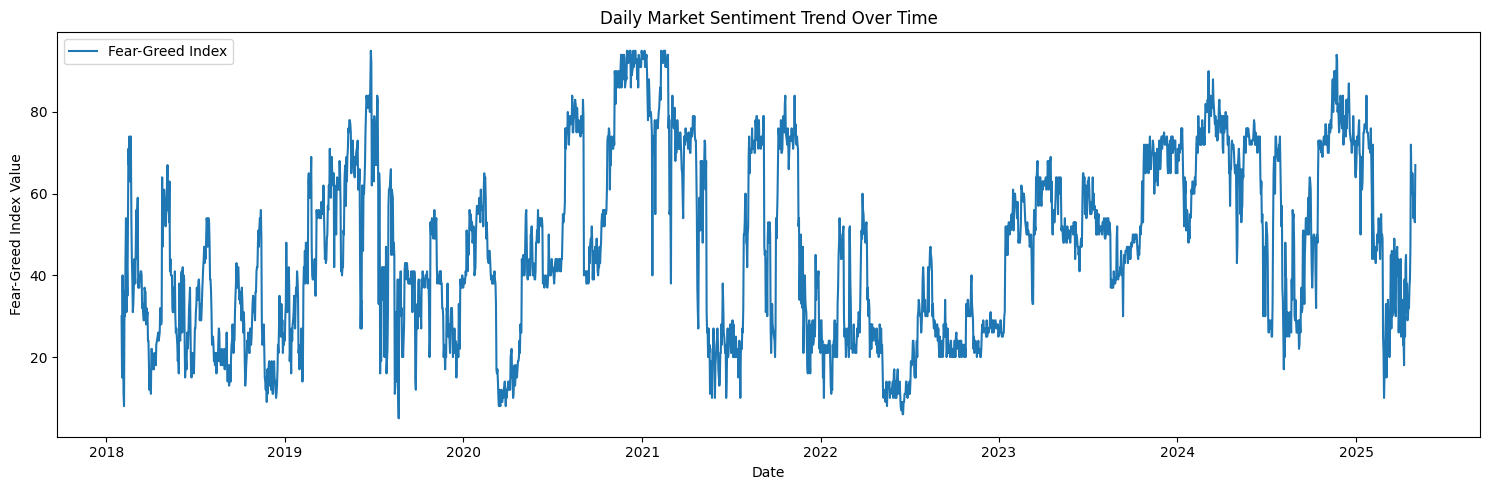

In [177]:
# Convert date column to datetime (if not already)
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Plot sentiment classification trend over time
plt.figure(figsize=(15,5))
sns.lineplot(data=sentiment_df, x='date', y='value', label='Fear-Greed Index')
plt.title('Daily Market Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Fear-Greed Index Value')
plt.tight_layout()
plt.show()



```
Observations:
1. The Fear-Greed Index trend reveals that market sentiment fluctuates frequently, oscillating between periods of Fear and Greed.
2. Short bursts of Extreme Greed appear occasionally, while Fear and Neutral sentiments dominate the timeline.
3. These shifts highlight the emotional volatility of the market, with frequent changes in trader sentiment likely impacting decision-making and risk-taking.
```





```
5.2 Number of Trades Over Time
```



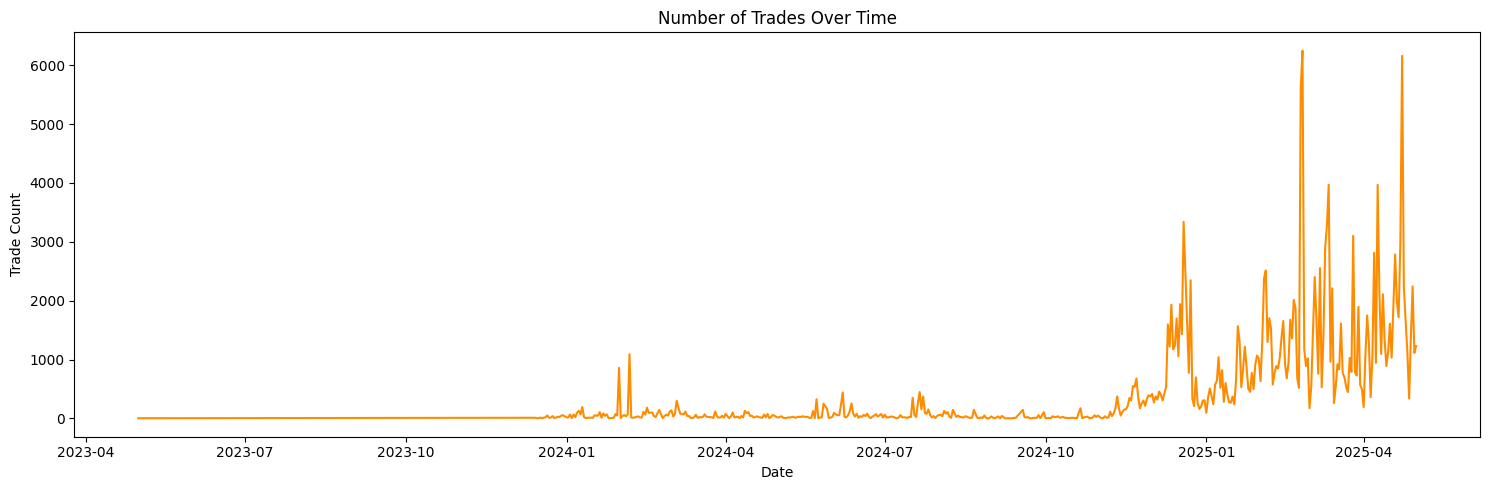

In [178]:
# Ensure Timestamp IST is datetime
merged_df['Timestamp IST'] = pd.to_datetime(merged_df['Timestamp IST'])

# Group by day
merged_df['Trade Date'] = merged_df['Timestamp IST'].dt.date
daily_trades = merged_df.groupby('Trade Date').size()

plt.figure(figsize=(15,5))
daily_trades.plot(kind='line', color='darkorange')
plt.title("Number of Trades Over Time")
plt.xlabel("Date")
plt.ylabel("Trade Count")
plt.tight_layout()
plt.show()



```
Observations:
1. Trade volume remains low (near 0) from mid-2023 to early 2024, with occasional small spikes.
A sharp increase occurs from mid-2024, peaking above 5,000 trades per day in early 2025, indicating a recent surge in trading activity.
```





```
5.3 Daily Average PnL Over Time
```



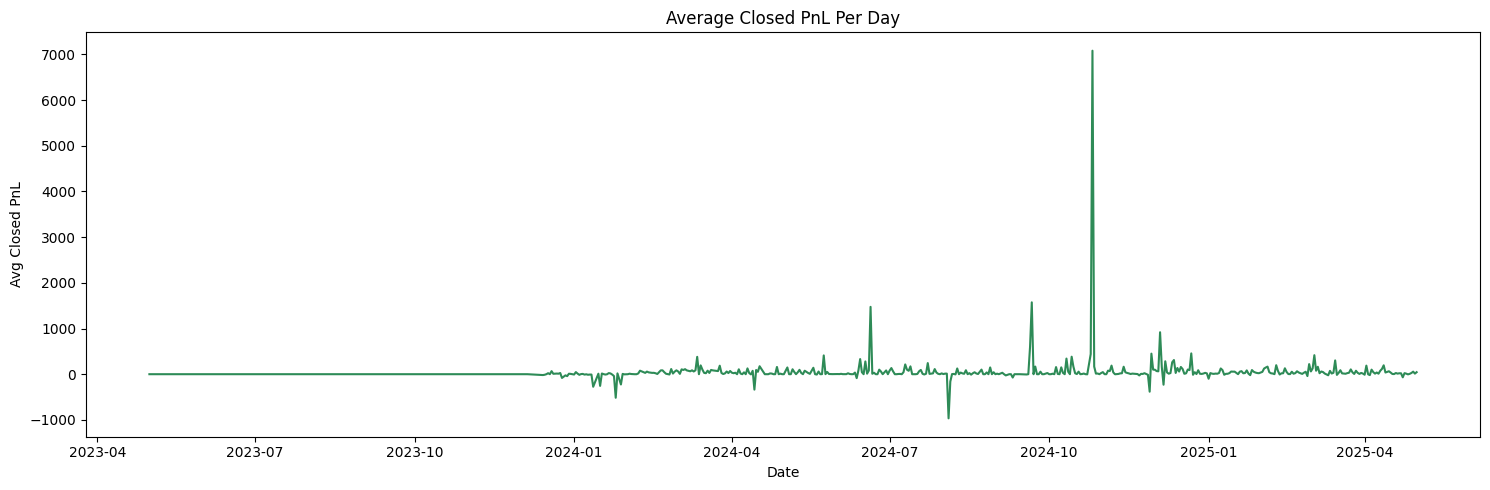

In [179]:
daily_avg_pnl = merged_df.groupby('Trade Date')['Closed PnL'].mean()

plt.figure(figsize=(15,5))
daily_avg_pnl.plot(color='seagreen')
plt.title("Average Closed PnL Per Day")
plt.xlabel("Date")
plt.ylabel("Avg Closed PnL")
plt.tight_layout()
plt.show()




```
Observations:
1. The average closed PnL per day remains close to zero from mid-2023 to mid-2024, with minor fluctuations.
2. A significant spike occurs around early 2025, reaching over 6000, indicating a major positive shift in average closed PnL.
3. Smaller peaks, around 1000-2000, are observed sporadically between mid-2024 and early 2025, suggesting intermittent high-profit days.
```



#### 6. Final Insights & Recommendations



```
1. Sentiment Strongly Influences Performance

a. Extreme Greed periods showed the highest average Closed PnL, indicating that traders often perform better when
confidence is high. However, these periods are short-lived and may carry risk of overconfidence.
b. Fear and Extreme Fear tend to coincide with high trade volumes but
lower profitability, reflecting reactionary or panic-driven trading.


```




```
2. Direction Matters: Some Positions Are Riskier

a. Trades like Close Short, Close Long, and Auto-Deleveraging had higher PnL variability, suggesting that exit positions carry more risk and reward.
b. Rare directions like Liquidated Isolated Short consistently led to large losses, especially under Extreme Fear.
c. More common directions (e.g., Buy, Sell, Open Long) had lower PnL variation, indicating safer, more stable strategies
```


```
3. Trade Size and Leverage Affect Risk

a. Larger trade sizes and start positions correlate with more extreme PnL outcomes, especially in volatile sentiments.
b. Outliers show that aggressive strategies can lead to big wins or big losses, emphasizing the need for careful risk management.
```



```
4. Timing Matters: Some Days Are More Profitable

a. Most days yield breakeven or low returns, but certain days show significant PnL spikes, often aligning with sentiment peaks.
b. Tracking sentiment trends over time can help identify potential entry and exit windows.

```




**Recommendations for Smarter Trading**
```
1. Monitor Market Sentiment: Use the Fear-Greed Index as a contextual tool, high greed = high opportunity and risk.
2. Focus on Directional Strategy: Prefer directions with historically stable PnL unless your strategy can handle high volatility.
3. Use Risk Caps for Large Trades: Implement position sizing and risk control, especially during emotional markets.
4. Time the Market with Sentiment Peaks: Consider entering during stable Greed and exiting before sentiment reversals.
5. Avoid Rare Directions Unless Expert: Trades like liquidation or short reversals should only be taken with strong rationale.
```

